# Part III - Selecting Heatwaves for Building Simulations

**Release history**

v0 : 2020-09-15

v1 : 2021-04-27

v2 : 2022-11-05

**License**

Licensed by La Rochelle University/LaSIE & CSTB under a BSD 3 license (https://opensource.org/licenses/BSD-3-Clause).

**To use this code please cite the following publication:**

*Machard, A. , Inard, C., Alessandrini, J.M., Pelé, C., Ribéron, J.
A Methodology for Assembling Future Weather Files Including Heatwaves for Building Thermal Simulations from the European Coordinated Regional Downscaling Experiment (EURO-CORDEX) Climate Data*
https://doi.org/10.3390/en13133424

**Description**

This code selects heatwaves from CORDEX climate data based on a methodology defined and validated in : 
*Ouzeau, G., Soubeyroux, J-M., Schneider,M., Vautard R., Planton, S.
Heat waves analysis over France in present and future climate: Application of a new method on the EURO-CORDEX ensemble* : https://doi.org/10.1016/j.cliser.2016.09.002

**Data**

Data for this workshop were downloaded from the CORDEX Platform https://cordex.org/ & then bias-adjusted using observations

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import os

In [2]:
city='Paris'

# Better to use bias-adjusted data
path_hist = r"C:\Users\MACHARD\Downloads\ARTICLES\Weather_Data_Code\Part-II-and-Part-III_ExampleFiles\Multiyears-BC_Roissy_MPI-RCA4_2010s.csv"
path_midterm = r"C:\Users\MACHARD\Downloads\ARTICLES\Weather_Data_Code\Part-II-and-Part-III_ExampleFiles\Multiyears-BC_Roissy_MPI-RCA4_2050s.csv"

# Path where to export the data as csv
path_out = r'C:\Users\MACHARD\Downloads\ARTICLES\Weather_Data_Code'

## **Opening the Multi-year weather data files**

In [3]:
df_hist = pd.read_csv(path_hist, header=0)
df_midterm = pd.read_csv(path_midterm, header=0)

In [8]:
idx_hist =  pd.date_range(start='1/1/1990', end='12/31/2019 23:00:00',freq="H")
idx_hist_28 = idx_hist[(idx_hist.day != 29) | (idx_hist.month != 2)] # Remove 29th of February
idx_midterm = pd.date_range(start='1/1/2040', end='12/31/2069 23:00:00',freq="H")
idx_midterm_28 = idx_midterm[(idx_midterm.day != 29) | (idx_midterm.month != 2)]

In [9]:
df_hist

,time_lst,tas [C],hurs [%],ps [Pa],sfcWind [m/s],rsds [kwh],clt [tenths],rsds [kwh].1,DNR[kwh],DHR[kwh],huss [kg/kg]
0,1990-01-01 00:00:00,11.346731,93.784299,101454.434682,8.786777,10.000000,0.0,0.0,0.0,9.589892,NaN
1,1990-01-01 01:00:00,11.346952,93.784498,101454.466551,8.786967,10.000000,0.0,0.0,0.0,9.590045,NaN
2,1990-01-01 02:00:00,11.247294,90.743987,101349.537338,8.533403,9.998957,0.0,0.0,0.0,9.221248,NaN
3,1990-01-01 03:00:00,11.514480,88.798264,101336.366568,8.745056,9.995820,0.0,0.0,0.0,9.176089,NaN
4,1990-01-01 04:00:00,12.068397,87.782917,101349.510505,8.810992,9.997519,0.0,0.0,0.0,9.390900,NaN
...,...,...,...,...,...,...,...,...,...,...,...
262795,2019-12-31 19:00:00,0.682196,89.674000,100536.061439,2.052545,10.000000,0.0,0.0,0.0,4.551923,NaN
262796,2019-12-31 20:00:00,1.342140,86.588042,100723.962354,3.124341,10.000000,0.0,0.0,0.0,4.598557,NaN
262797,2019-12-31 21:00:00,-0.049998,95.832483,100428.116570,4.216430,9.998518,0.0,0.0,0.0,4.622912,NaN
262798,2019-12-31 22:00:00,-0.049966,95.832485,100432.429177,4.216435,9.998518,0.0,0.0,0.0,4.622924,NaN


In [10]:
df_midterm

,time_lst,tas [C],hurs [%],ps [Pa],sfcWind [m/s],rsds [kwh],clt [tenths],rsds [kwh].1,DNR[kwh],DHR[kwh],huss [kg/kg],W
0,2040-01-01 00:00:00,13.920689,72.160123,101468.657077,6.095967,0.026551,8.720436,0.0,0.0,0.0,8.657739,7.926941
1,2040-01-01 01:00:00,13.921024,72.161672,101468.698008,6.095976,0.037212,8.720436,0.0,0.0,0.0,8.658103,7.927323
2,2040-01-01 02:00:00,13.636547,71.875896,101367.983012,6.084079,0.057285,8.708115,0.0,0.0,0.0,8.474203,7.738013
3,2040-01-01 03:00:00,11.418066,78.816822,101549.384627,6.130903,0.090821,8.726310,0.0,0.0,0.0,8.095552,7.273318
4,2040-01-01 04:00:00,10.659458,87.594803,101458.921647,5.289859,0.020168,8.722471,0.0,0.0,0.0,8.577753,7.745094
...,...,...,...,...,...,...,...,...,...,...,...,...
262795,2069-12-31 19:00:00,11.247927,79.001792,101842.673154,6.281312,3567.594745,10.000000,0.0,0.0,0.0,8.028345,7.178004
262796,2069-12-31 20:00:00,11.251024,78.999179,101783.057443,6.285772,3572.588132,10.000000,0.0,0.0,0.0,8.029642,7.184075
262797,2069-12-31 21:00:00,11.147802,79.004985,101782.452004,6.278936,3578.306660,10.000000,0.0,0.0,0.0,7.978309,7.130042
262798,2069-12-31 22:00:00,11.147828,79.005191,101782.466392,6.279007,3596.577994,10.000000,0.0,0.0,0.0,7.978343,7.130076


## **Indexing multiyear files**

**If the user files don't include 29 of February:** 
<br>
Use the indexes "idx_hist_28", "idx_midterm_28", "idx_longterm_28", they dont include all 29 of February
<br>
<br>
**If the user files include 29 of February:** 
<br>
Use the indexes "idx_hist", "idx_midterm", "idx_longterm", they include all 29 of February
<br>
<br>

In [11]:
#df_hist.index = pd.to_datetime(idx_hist)
#df_midterm.index = pd.to_datetime(idx_midterm)
## Use the ones that follow if your datasets do not contain 29-02 anymore
df_hist.index = pd.to_datetime(idx_hist_28)
df_midterm.index = pd.to_datetime(idx_midterm_28)

In [17]:
# Calculating daily temperature means
temp_hist = df_hist['tas [C]'].squeeze().resample('24H').mean() 
temp_midterm = df_midterm['tas [C]'].squeeze().resample('24H').mean()

# Temperature thresholds to characterize heatwaves
spic = temp_hist.quantile(0.995)
sdeb = temp_hist.quantile(0.975)
sint = temp_hist.quantile(0.95)

In [19]:
spic

26.034930555746136

In [20]:
sdeb

23.2521704546656

In [21]:
sint

21.776329719157435

In [22]:
temp_hist_dailymean = pd.DataFrame({'Hist Temp': temp_hist, 'Sint': [sint]*len(temp_hist), 'Sdeb':[sdeb]*len(temp_hist), 'Spic':[spic]*len(temp_hist)})
temp_midterm_dailymean = pd.DataFrame({'Midterm Temp': temp_midterm, 'Sint': [sint]*len(temp_midterm), 'Sdeb':[sdeb]*len(temp_midterm), 'Spic':[spic]*len(temp_midterm)})

## **Visualizing Multi-year daily mean temperatures above historical thresholds**

<AxesSubplot:>

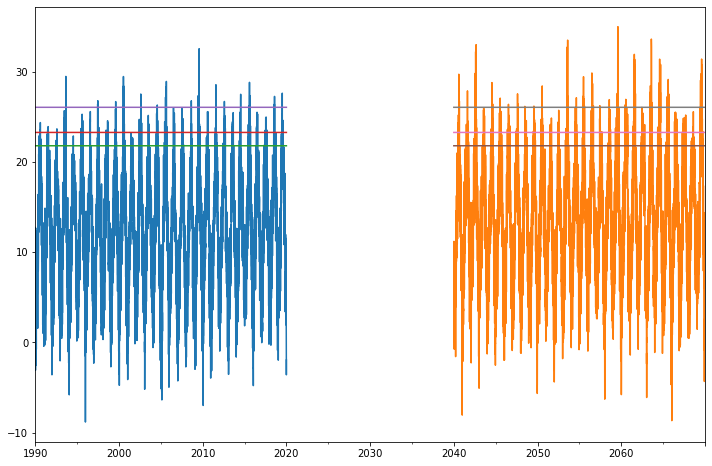

In [31]:
temp_hist_dailymean['Hist Temp'].plot(figsize=(12,8))
temp_midterm_dailymean['Midterm Temp'].plot(figsize=(12,8))
temp_hist_dailymean['Sint'].plot()
temp_hist_dailymean['Sdeb'].plot()
temp_hist_dailymean['Spic'].plot()
temp_midterm_dailymean['Sint'].plot()
temp_midterm_dailymean['Sdeb'].plot()
temp_midterm_dailymean['Spic'].plot()

## **Heatwaves Detection**

In [32]:
# This function detects heatwaves over a 20 years dataset. 
# It returns a list of heatwaves, the heatwaves, a list of their severities a list of their duration, and a list of their Tmax

def get_dict_hws(daily_temp, spic, sdeb, sint):
    
    # Creating result, an empty dataframe with a series of 20 years daily temperatures
    result = pd.DataFrame({'Daily_Temp': daily_temp, 'sup_SPIC':"", '>SDEB':"", 'cons_SDEB':""})
    result['month']=result.index.month
    
    # Analysing only months from June to September included. !!! These must be replaced according to the summer period of the city of interest !!!
    #filter_mask = (result['month'] > 5) & (result['month'] < 10)
    df = result
    df.index = pd.to_datetime(df.index)
    del df['month']
    
    # Finding where the daily temperature exceeds the threshold SPIC
    df['sup_SPIC'] = np.where(df['Daily_Temp']>spic,df['Daily_Temp'],int(0))
    
    # Finding where the daily temperature exceeds the threshold SDEB
    df['>SDEB'] = np.where(df['Daily_Temp']>sdeb,df['Daily_Temp'],int(0))
    
    # Adding all the temperatures above the SDEB threshold to temp_sdeb
    temp_sdeb = df['>SDEB'].tolist()
    
    # Analyzing if temperatures are consecutive with a minimum of 3 days gap. If yes, filling the 'in between' days wit h1
    for i in range(0,len(temp_sdeb)-4):
    
        if ((temp_sdeb[i]!=0) and (temp_sdeb[i+4]!=0)):
            temp_sdeb[i+1]=1
            temp_sdeb[i+2]=1 
            temp_sdeb[i+3]=1
            
        if ((temp_sdeb[i]!=0) and (temp_sdeb[i+3]!=0)):
            temp_sdeb[i+1]=1
            temp_sdeb[i+2]=1 
            
        if ((temp_sdeb[i]!=0) and (temp_sdeb[i+2]!=0)):
            temp_sdeb[i+1]=1
            
    
    # Adding the list temp_sdeb to the dataframe column 'cons_SDEB'
    df['cons_SDEB'] = temp_sdeb
    
    # Replacing the 1 values with the temperature
    df['cons_SDEB'] = np.where(df['cons_SDEB']==1,df['Daily_Temp'],df['cons_SDEB'])
    
    # Filling with 0 if the heatwaves temperatures fall under the SINT threshold
    df['cons_SDEB'] = np.where(df['cons_SDEB']<sint,int(0),df['cons_SDEB'])
    
    # Keeping only the heatwaves temperatures where there is no 0
    df_reduit = df.loc[(df['cons_SDEB']!=0)]
    del df_reduit['Daily_Temp']
    del df_reduit['>SDEB']
    
    # Storing in hws a list of heatwaves (sorting through consecutive days)
    hws_idx = []
            
    for i in range(0, len(df_reduit)):
        if (df_reduit.index.dayofyear[i]-df_reduit.index.dayofyear[i-1])!=1:
            hws_idx.append(int(np.where(df_reduit.index==df_reduit.index[i])[0]))
    
    hws = []
    for i in range(0, len(hws_idx)-1):
        hws.append(df_reduit.iloc[hws_idx[i]:hws_idx[i+1]])
    
    for i in range(len(hws_idx)-1, len(hws_idx)):
        hws.append(df_reduit.iloc[hws_idx[i]:len(df_reduit)])
    
    ## Keeping in hws2 only the hws for which there is a temp > SPIC 
    hws2 = []
    for i in range(0, len(hws)):
        for a in range(0, len(hws[i])):
            if (hws[i]['sup_SPIC'][a]) > 1:
                hws2.append(hws[i])
                break
    
    ## Keeping in hws3 only the hws that are min 5 days long
    hws3 = []
    for i in range(0, len(hws2)):
        if len(hws2[i])>=5:
            hws3.append(hws2[i])
    
    # Calculating for each heatwave the severity and adding it to the list severities
    severities=[]
    for i in range(0, len(hws3)):
        b=0
        for j in range(0, len(hws3[i])):
            if (hws3[i]['cons_SDEB'][j])>sdeb:
                x = (hws3[i]['cons_SDEB'][j])-sdeb
                b=b+x
            
        severity=b/(spic-sdeb)
        severities.append(severity)
    
    # Calculating for each heatwave the length and adding it to the list lenghts
    lenghts=[]
    for i in range(0, len(hws3)):
        lenghts.append(len(hws3[i]))
    
    # Calculating for each heatwave the Tmax and adding it to the list maxs
    maxs=[]
    for i in range(0, len(hws3)):
        maxs.append(hws3[i]['sup_SPIC'].max())
    
    # Creating liste_hws, a list of lists containing all heatwaves characteristics
    liste_hws = [] 
    for (e, f, g, h) in zip(hws3, lenghts, maxs, severities): 
         liste_hws.append([e,f,g,h])

    return liste_hws, hws3, severities, lenghts, maxs

In [33]:
# Calling the function
list_hws_hist = get_dict_hws(temp_hist,spic,sdeb,sint)
list_hws_midterm = get_dict_hws(temp_midterm,spic,sdeb,sint)

In [34]:
print('Number of historical heatwaves:',len(list_hws_hist[0]))

Number of historical heatwaves: 10


In [35]:
print('Number of future mid-term heatwaves:',len(list_hws_midterm[0]))

Number of future mid-term heatwaves: 34


In [68]:
df_hw_hist_all = pd.DataFrame(list_hws_hist[0]) # list of heatwaves
df_hw_hist = pd.DataFrame(list_hws_hist[1]) # heatwaves
df_hw_hist_severity = pd.DataFrame(list_hws_hist[2])
df_hw_hist_duration = pd.DataFrame(list_hws_hist[3])
df_hw_hist_intensity = pd.DataFrame(list_hws_hist[4])

df_hw_midterm_all = pd.DataFrame(list_hws_midterm[0]) # list of heatwaves
df_hw_midterm = pd.DataFrame(list_hws_midterm[1]) # heatwaves
df_hw_midterm_severity = pd.DataFrame(list_hws_midterm[2])
df_hw_midterm_duration = pd.DataFrame(list_hws_midterm[3])
df_hw_midterm_intensity = pd.DataFrame(list_hws_midterm[4])

C:\Users\MACHARD\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


## **Exporting Heatwaves Data**

In [69]:
df_hw_hist_all.to_csv(path_out+'\\'+'Part-III_HW_data_historical.csv')
df_hw_midterm_all.to_csv(path_out+'\\'+'Part-III_HW_data_midterm.csv')

## **Finding the 3 Most Extreme Heatwaves: Most Intense, Most Severe, Longest**

In [70]:
def find_extreme_heatwaves(list_hws):
    
    ## Max (intensity in °C)
    liste_intensities = list_hws[4] ## list of heatwave tmaxs
    mostintense_value = max(liste_intensities) # Return the max value of the list. 
    index_mostintense = liste_intensities.index(mostintense_value)
    hw_mostintense = list_hws[1][index_mostintense] # Find the heatwave with the max value
    year_mostintense = hw_mostintense.index
    itensity_hw_mostintense = round(list_hws[4][index_mostintense],1)
    severity_hw_mostintense = round(list_hws[2][index_mostintense],1)
    duration_hw_mostintense = list_hws[3][index_mostintense]
    beg_hw_mostintense = year_mostintense.strftime("%Y-%m-%d")[0]
    end_hw_mostintense = year_mostintense.strftime("%Y-%m-%d")[-1]
    carac_hw_mostintense = [itensity_hw_mostintense, severity_hw_mostintense, duration_hw_mostintense,beg_hw_mostintense, end_hw_mostintense]
    print('HW most intense', hw_mostintense) 
    print('\n')
    print(carac_hw_mostintense)
    print('\n')
    
    ## Severity (in °C.hours above Sdeb threshold)
    liste_severities = list_hws[2] ## list of heatwave severities
    mostsevere_value = max(liste_severities) # Return the max value of the list. 
    index_mostsevere = liste_severities.index(mostsevere_value)
    hw_mostsevere = list_hws[1][index_mostsevere] # Find the most severe heatwave
    year_mostsevere = hw_mostsevere.index
    itensity_hw_mostsevere = round(list_hws[4][index_mostsevere],1)
    severity_hw_mostsevere = round(list_hws[2][index_mostsevere],1)
    duration_hw_mostsevere = list_hws[3][index_mostsevere]
    beg_hw_mostsevere = year_mostsevere.strftime("%Y-%m-%d")[0]
    end_hw_mostsevere = year_mostsevere.strftime("%Y-%m-%d")[-1]
    carac_hw_mostsevere = [itensity_hw_mostsevere, severity_hw_mostsevere, duration_hw_mostsevere,beg_hw_mostsevere, end_hw_mostsevere]
    print('HW most severe', hw_mostsevere) 
    print('\n')
    print(carac_hw_mostsevere)
    print('\n')    
    
    ## Duration (in days)
    liste_durations = list_hws[3] 
    longest_value = max(liste_durations) # Return the max value of the list
    index_longest = liste_durations.index(longest_value)
    hw_longest = list_hws[1][index_longest] # Find the most severe heatwave
    year_longest = hw_longest.index
    itensity_hw_longest = round(list_hws[4][index_longest],1)
    severity_hw_longest = round(list_hws[2][index_longest],1)
    duration_hw_longest = list_hws[3][index_longest]
    beg_hw_longest = year_longest.strftime("%Y-%m-%d")[0]
    end_hw_longest = year_longest.strftime("%Y-%m-%d")[-1]
    carac_hw_longest = [itensity_hw_longest, severity_hw_longest, duration_hw_longest,beg_hw_longest, end_hw_longest]
    print('HW longest', hw_longest) 
    print('\n')
    print(carac_hw_longest)
    print('\n')    
    
    return hw_mostintense, index_mostintense, carac_hw_mostintense, hw_mostsevere, index_mostsevere, carac_hw_mostsevere, hw_longest, index_longest,carac_hw_longest

In [71]:
hw_mostintense_histo, index_mostintense_histo, carac_hw_mostintense_histo, hw_mostsevere_histo, index_mostsevere_histo, carac_hw_mostsevere_histo, hw_longest_histo, index_longest_histo, carac_hw_longest_histo = find_extreme_heatwaves(list_hws_hist)

HW most intense              sup_SPIC  cons_SDEB
2009-07-25   0.000000  23.934080
2009-07-26  27.544667  27.544667
2009-07-27  29.771776  29.771776
2009-07-28  32.524514  32.524514
2009-07-29  31.983878  31.983878
2009-07-30  31.288433  31.288433
2009-07-31  29.910068  29.910068
2009-08-01   0.000000  24.851612
2009-08-02   0.000000  23.781417


[32.5, 16.6, 9, '2009-07-25', '2009-08-02']


HW most severe              sup_SPIC  cons_SDEB
2009-07-25   0.000000  23.934080
2009-07-26  27.544667  27.544667
2009-07-27  29.771776  29.771776
2009-07-28  32.524514  32.524514
2009-07-29  31.983878  31.983878
2009-07-30  31.288433  31.288433
2009-07-31  29.910068  29.910068
2009-08-01   0.000000  24.851612
2009-08-02   0.000000  23.781417


[32.5, 16.6, 9, '2009-07-25', '2009-08-02']


HW longest              sup_SPIC  cons_SDEB
2000-07-08   0.000000  24.811208
2000-07-09   0.000000  25.786714
2000-07-10   0.000000  24.919074
2000-07-11   0.000000  25.318955
2000-07-12  29.443524  29.443524
2000

In [72]:
hw_mostintense_midterm, index_mostintense_midterm, carac_hw_mostintense_midterm, hw_mostsevere_midterm, index_mostsevere_midterm,carac_hw_mostsevere_midterm, hw_longest_midterm, index_longest_midterm, carac_hw_longest_midterm = find_extreme_heatwaves(list_hws_midterm)

HW most intense              sup_SPIC  cons_SDEB
2059-07-30  26.574726  26.574726
2059-07-31   0.000000  23.193423
2059-08-01   0.000000  25.793659
2059-08-02  31.994330  31.994330
2059-08-03  31.316312  31.316312
2059-08-04  28.157909  28.157909
2059-08-05  28.300883  28.300883
2059-08-06  27.787673  27.787673
2059-08-07  31.434188  31.434188
2059-08-08  32.036986  32.036986
2059-08-09  32.393305  32.393305
2059-08-10  34.963425  34.963425
2059-08-11  31.624814  31.624814
2059-08-12   0.000000  25.581248


[35.0, 30.8, 14, '2059-07-30', '2059-08-12']


HW most severe              sup_SPIC  cons_SDEB
2061-07-15   0.000000  24.316305
2061-07-16  28.331372  28.331372
2061-07-17  28.656185  28.656185
2061-07-18  29.971123  29.971123
2061-07-19  29.191805  29.191805
2061-07-20  29.214554  29.214554
2061-07-21  27.033577  27.033577
2061-07-22   0.000000  25.922296
2061-07-23  27.682803  27.682803
2061-07-24  31.107318  31.107318
2061-07-25  31.900389  31.900389
2061-07-26  30.469679  30.469

In [73]:
df = pd.DataFrame({'Max Daily Tmean (C)':"", 'Severity (C.hours)':"", 'Duration (days)':"", 'Beg HW':"", 'End HW':""},
                 index=['Historical HW Most Intense', 'Historical HW Most Severe', 'Historical HW Longest',
                       'Future Midterm HW Most Intense', 'Future Midterm HW Most Severe', 'Future Midterm HW Longest'])

In [74]:
df.loc['Historical HW Most Intense'] = carac_hw_mostintense_histo
df.loc['Historical HW Most Severe'] = carac_hw_mostsevere_histo
df.loc['Historical HW Longest'] = carac_hw_longest_histo
df.loc['Future Midterm HW Most Intense'] = carac_hw_mostintense_midterm
df.loc['Future Midterm HW Most Severe'] = carac_hw_mostsevere_midterm
df.loc['Future Midterm HW Longest'] = carac_hw_longest_midterm

In [75]:
df

,Max Daily Tmean (C),Severity (C.hours),Duration (days),Beg HW,End HW
Historical HW Most Intense,32.5,16.6,9,2009-07-25,2009-08-02
Historical HW Most Severe,32.5,16.6,9,2009-07-25,2009-08-02
Historical HW Longest,29.4,11.3,11,2000-07-08,2000-07-18
Future Midterm HW Most Intense,35.0,30.8,14,2059-07-30,2059-08-12
Future Midterm HW Most Severe,31.9,61.3,42,2061-07-15,2061-08-25
Future Midterm HW Longest,31.9,61.3,42,2061-07-15,2061-08-25


## **Exporting extreme heatwaves data**

In [80]:
df.to_csv(path_out+'\\'+'Part-III_XTRM-HW_data.csv')
title=path_out+'\\'+'Part-III_XTRM-HW_Heatwaves_info.txt'
a='Number of histo HW: '+str(len(list_hws_hist[0]))
b='Number of future mid-term HW: '+str(len(list_hws_midterm[0]))
d='Spic: '+str(round(spic,1))
e='Sdeb: '+str(round(sdeb,1))
f='Sint: '+str(round(sint,1))
with open(title, 'w') as filehandle:
    filebuffer = [a, b, d, e, f]
    filehandle.writelines("%s\n" % line for line in filebuffer)
filehandle.close()

In [79]:
##### Historical ######
if (df.iloc[0]['Beg HW'].split('-')[0] == df.iloc[1]['Beg HW'].split('-')[0] == df.iloc[2]['Beg HW'].split('-')[0]):
    df_hist.loc[df.iloc[0]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Historical_MostIntense_MostSevere_Longest'+'_'+df.iloc[0]['Beg HW'].split('-')[0]+'.csv')

isittrue1 = (df.iloc[0]['Beg HW'].split('-')[0] == df.iloc[1]['Beg HW'].split('-')[0] == df.iloc[2]['Beg HW'].split('-')[0])

if (df.iloc[0]['Beg HW'].split('-')[0] == df.iloc[1]['Beg HW'].split('-')[0]) and (isittrue1==False):
    df_hist.loc[df.iloc[0]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Historical_MostIntense_MostSevere'+'_'+df.iloc[0]['Beg HW'].split('-')[0]+'.csv')

if (df.iloc[0]['Beg HW'].split('-')[0] != df.iloc[1]['Beg HW'].split('-')[0]) and (isittrue1==False):
    df_hist.loc[df.iloc[0]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Historical_MostIntense'+'_'+df.iloc[0]['Beg HW'].split('-')[0]+'.csv')
   
if (df.iloc[1]['Beg HW'].split('-')[0] == df.iloc[2]['Beg HW'].split('-')[0]) and (isittrue1==False):
    df_hist.loc[df.iloc[1]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Historical_MostSevere_Longest'+'_'+df.iloc[1]['Beg HW'].split('-')[0]+'.csv')

if (isittrue1==False) and (df.iloc[1]['Beg HW'].split('-')[0] != df.iloc[2]['Beg HW'].split('-')[0]):
    df_hist.loc[df.iloc[2]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Historical_Longest'+'_'+df.iloc[2]['Beg HW'].split('-')[0]+'.csv')

if ((df.iloc[0]['Beg HW'].split('-')[0] != df.iloc[1]['Beg HW'].split('-')[0]) and (df.iloc[1]['Beg HW'].split('-')[0] != df.iloc[2]['Beg HW'].split('-')[0])):
    df_hist.loc[df.iloc[1]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Historical_MostSevere'+'_'+df.iloc[1]['Beg HW'].split('-')[0]+'.csv')
 

##### Midterm ######
if (df.iloc[3]['Beg HW'].split('-')[0] == df.iloc[4]['Beg HW'].split('-')[0] == df.iloc[5]['Beg HW'].split('-')[0]):
    df_midterm.loc[df.iloc[3]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Midterm_MostIntense_MostSevere_Longest'+'_'+df.iloc[3]['Beg HW'].split('-')[0]+'.csv')

isittrue2 = (df.iloc[3]['Beg HW'].split('-')[0] == df.iloc[4]['Beg HW'].split('-')[0] == df.iloc[5]['Beg HW'].split('-')[0])

if (df.iloc[3]['Beg HW'].split('-')[0] == df.iloc[4]['Beg HW'].split('-')[0]) and (isittrue2==False):
    df_midterm.loc[df.iloc[3]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Midterm_MostIntense_MostSevere'+'_'+df.iloc[3]['Beg HW'].split('-')[0]+'.csv')

if (df.iloc[3]['Beg HW'].split('-')[0] != df.iloc[4]['Beg HW'].split('-')[0]) and (isittrue2==False):
    df_midterm.loc[df.iloc[3]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Midterm_MostIntense'+'_'+df.iloc[3]['Beg HW'].split('-')[0]+'.csv')
    
if (df.iloc[4]['Beg HW'].split('-')[0] == df.iloc[5]['Beg HW'].split('-')[0]) and (isittrue2==False):
    df_midterm.loc[df.iloc[4]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Midterm_MostSevere_Longest'+'_'+df.iloc[4]['Beg HW'].split('-')[0]+'.csv')

if (isittrue2==False) and (df.iloc[4]['Beg HW'].split('-')[0]) != (df.iloc[5]['Beg HW'].split('-')[0]):
    df_midterm.loc[df.iloc[5]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Midterm_Longest'+'_'+df.iloc[5]['Beg HW'].split('-')[0]+'.csv')

if ((df.iloc[3]['Beg HW'].split('-')[0] != df.iloc[4]['Beg HW'].split('-')[0]) and (df.iloc[4]['Beg HW'].split('-')[0] != df.iloc[5]['Beg HW'].split('-')[0])):
    df_midterm.loc[df.iloc[4]['Beg HW'].split('-')[0]].to_csv(path_out+'\\'+'Part-III_XTRM-HW_Midterm_MostSevere'+'_'+df.iloc[4]['Beg HW'].split('-')[0]+'.csv')    

## **Visualizing all heatwaves & the extreme heatwaves**

In [84]:
if city == 'Paris':
    c='mistyrose'
    e = 'coral'
    ec='indianred'
    
# Creating patches (circles)
patches = []

# For each heatwave:
# x is the lenght
# y is the tmax
# bubblesize is the severity

# Future midterm heatwaves
for i in range(0, len(list_hws_midterm[2])):
        fig_x_midterm = list_hws_midterm[3][i]
        fig_y_midterm = list_hws_midterm[4][i]
        fig_bubblesize_midterm= list_hws_midterm[2][i]/10
        circle_midterm = Circle((fig_x_midterm, fig_y_midterm), fig_bubblesize_midterm, color=e)
        patches.append(circle_midterm)
        
# Historical heatwaves
for i in range(0, len(list_hws_hist[2])):
        fig_x_hist = list_hws_hist[3][i]
        fig_y_hist = list_hws_hist[4][i]
        fig_bubblesize_hist = list_hws_hist[2][i]/10
        circle_hist = Circle((fig_x_hist, fig_y_hist), fig_bubblesize_hist, color=c)
        patches.append(circle_hist)
        
        
# Extreme heatwaves
patches_extremes = []
indexes_extremes_histo = [index_mostintense_histo, index_mostsevere_histo, index_longest_histo]
indexes_extremes_midterm = [index_mostintense_midterm, index_mostsevere_midterm, index_longest_midterm]

for i in indexes_extremes_midterm:
        fig_x_midterm = list_hws_midterm[3][i]
        fig_y_midterm = list_hws_midterm[4][i]
        fig_bubblesize_midterm= list_hws_midterm[2][i]/10
        circle_midterm = Circle((fig_x_midterm, fig_y_midterm), fig_bubblesize_midterm, color=e)
        patches_extremes.append(circle_midterm) 
        
for i in indexes_extremes_histo:
        fig_x_histo = list_hws_hist[3][i]
        fig_y_histo = list_hws_hist[4][i]
        fig_bubblesize_histo= list_hws_hist[2][i]/10
        circle_histo = Circle((fig_x_histo, fig_y_histo), fig_bubblesize_histo, color=c)
        patches_extremes.append(circle_histo)

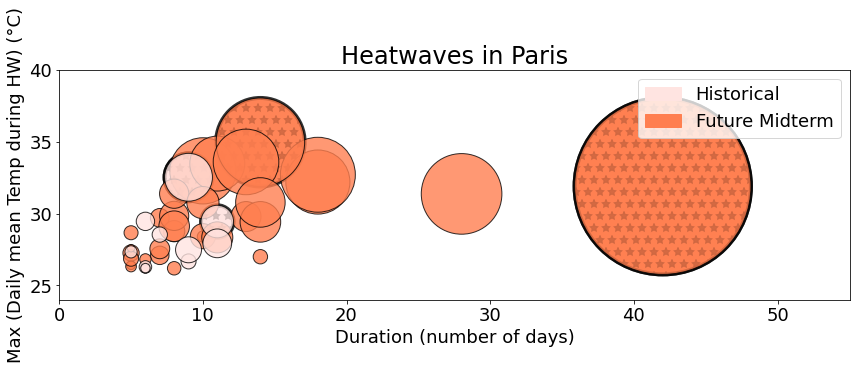

In [89]:
### `PLOT  ####
p = PatchCollection(patches, match_original=True, edgecolor='black') ## this means that the colors given to the patches will be used
p.set_alpha(0.8) ## Set bubbles transparency
p2 = PatchCollection(patches_extremes, match_original=True,edgecolor='black',hatch='*',linewidth=4) ## Set bubbles transparency
p2.set_alpha(0.8)
fig, ax = plt.subplots(figsize=(12, 18))
ax.add_collection(p2)
ax.add_collection(p)
ax.set_aspect('equal') ## keep the circles round
plt.legend([circle_hist, circle_midterm], ['Historical','Future Midterm'],fontsize=18)

### `Change these that the bubbles fit the frame ####
plt.ylim(top=40,bottom=24)
plt.xlim(right=55, left=0)

############################################################
plt.xlabel("Duration (number of days)", fontsize=18)
plt.ylabel("Max (Daily mean Temp during HW) (°C)", fontsize=18)
plt.title('Heatwaves in '+city, fontsize=24)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.savefig(path_out+'\\'+'Part-III_Heatwaves.svg', bbox_inches='tight')
plt.show()

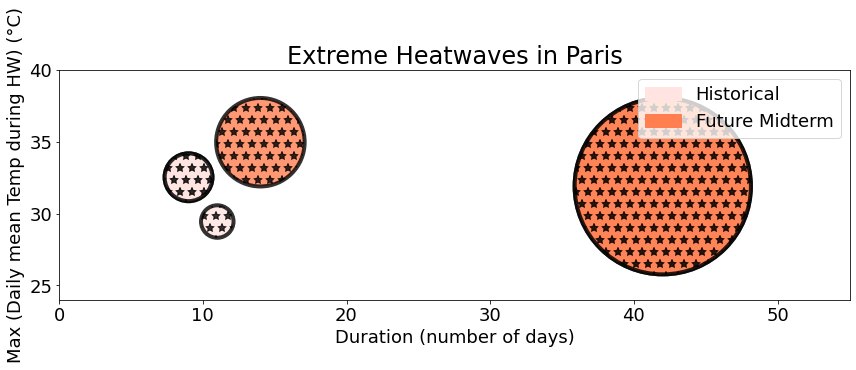

In [94]:
### `PLOT  ####
p2 = PatchCollection(patches_extremes, match_original=True,edgecolor='black',hatch='*',linewidth=4) ## Set bubbles transparency
p2.set_alpha(0.8)
fig, ax = plt.subplots(figsize=(12, 18))
ax.add_collection(p2)
ax.set_aspect('equal') ## keep the circles round
plt.legend([circle_hist, circle_midterm], ['Historical','Future Midterm'],fontsize=18)

### `Change these that the bubbles fit the frame ####
plt.ylim(top=40,bottom=24)
plt.xlim(right=55, left=0)

############################################################
plt.xlabel("Duration (number of days)", fontsize=18)
plt.ylabel("Max (Daily mean Temp during HW) (°C)", fontsize=18)
plt.title('Extreme Heatwaves in '+city, fontsize=24)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.savefig(path_out+'\\'+'Part-III_XTRM-Heatwaves.svg', bbox_inches='tight')
plt.show()